<a href="https://colab.research.google.com/github/athai16/codepath-prework/blob/main/Copy_of_lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [157]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [158]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (2).csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [159]:
#outlier check

# Identify problematic values
print(df['order_year_month'].unique())

# Handle invalid values
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')

print(df)

['2021-07' '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01'
 '2022-02' '2022-03' '2022-04' '2022-05' '2022-06' nan '2029-07' '1922-06'
 '2421-09' '2029-06' '2029-08' '2020-08' '2020-09' '2020-10' '2020-11'
 '2020-12' '2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06'
 '2020-07' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06']
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  

In [160]:
#cleanup

#handle invalid values
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')

#filter our product prices over 200k
df = df[df['product_price'] <= 200000]

#filter our quantities over 100k
df = df[df['quantity'] <= 100000]

#extract year component and create new column called 'order_year'
df['order_year'] = df['order_year_month'].dt.year

#filter data for the years 2000 to 2022
df = df[(df['order_year'] >= 2000) & (df['order_year'] <= 2022)]

print(df)


       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [161]:
# Convert the 'order_year_month' column to datetime format
df['order_year_month'] = pd.to_datetime(df['order_year_month'])

# Extract the month component and create a new column called 'order_month'
df['order_month'] = df['order_year_month'].dt.month

# Print the DataFrame to verify changes
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [162]:
#impute values

df['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [163]:
#total amount variable based on quantity and price

import pandas as pd

df = pd.DataFrame(df)

df['total_amount'] = df['quantity'] * df['product_price']

print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [164]:
# Create a sample DataFrame

df = pd.DataFrame(df)

# Create a variable called "complete_customer_info"
df['complete_customer_info'] = (df['customer_name'].notnull() & df['city'].notnull() & df['state_province'].notnull())

# Assign 1 for True and 2 for False
df['complete_customer_info'] = df['complete_customer_info'].apply(lambda x: 1 if x else 2)


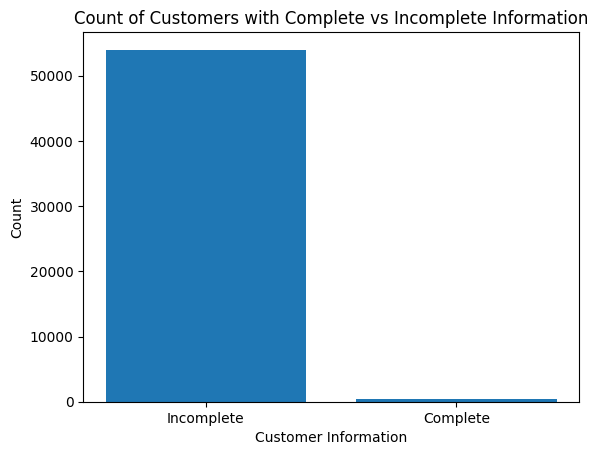

In [165]:
#create chart

import matplotlib.pyplot as plt

plt.bar(['Incomplete', 'Complete'], df['complete_customer_info'].value_counts())
plt.xlabel('Customer Information')
plt.ylabel('Count')
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.show()


In [166]:
import pandas as pd

df = pd.DataFrame(df)

# Compute the count of customers with complete information
complete_customers = ((df['customer_name'].notnull()) &
                      (df['city'].notnull()) &
                      (df['state_province'].notnull()))

# Print the count of complete and incomplete customers
complete_count = complete_customers.sum()
incomplete_count = len(df) - complete_count

print("Count of customers with complete information:", complete_count)
print("Count of customers with incomplete information:", incomplete_count)


Count of customers with complete information: 53973
Count of customers with incomplete information: 469


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [167]:
#seasonality

df = pd.DataFrame(df)

# Define the function to map numerical month values to seasons
def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to map numerical month values to seasons
df['season'] = df['order_month'].map(map_season)

# Print the DataFrame to see the results
print(df)




       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

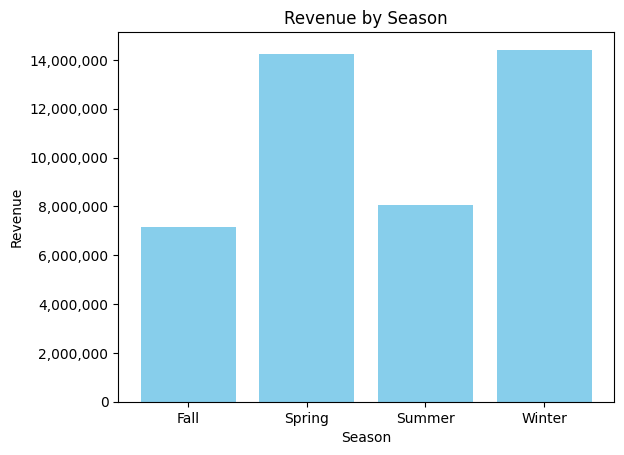

In [168]:
#revenue over time

#revenue by season

df = pd.DataFrame(df)

# Apply the function to map numerical month values to seasons
df['season'] = df['order_month'].map(map_season)

# Calculate revenue by season
revenue_by_season = df.groupby('season')['total_amount'].sum()

# Plot the bar chart
plt.bar(revenue_by_season.index, revenue_by_season.values, color='skyblue')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')

# Format y-axis tick labels as integers
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

# Show the plot
plt.show()


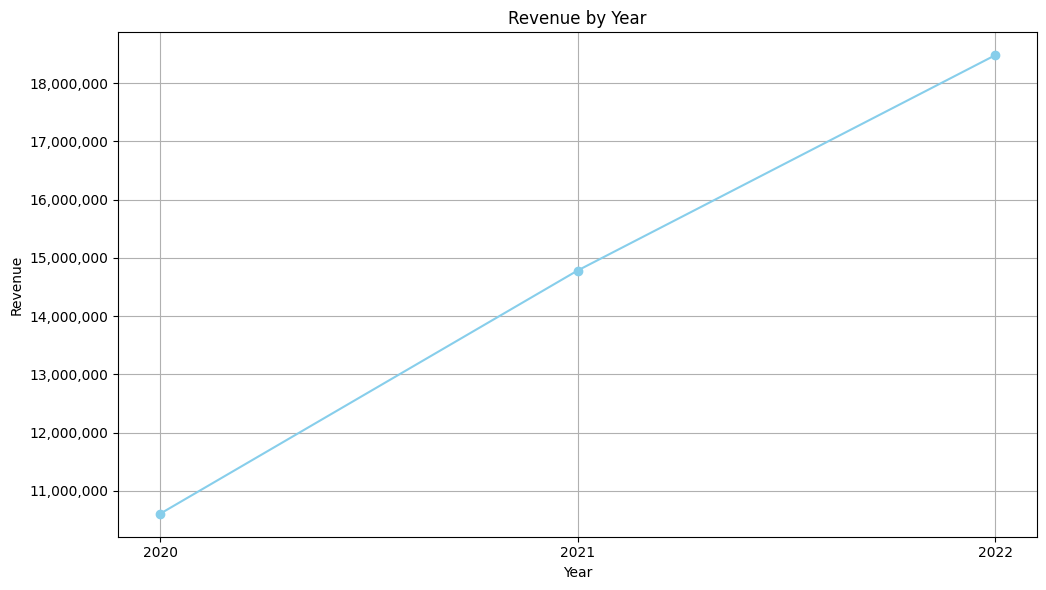

In [169]:
#revenue by year
# Calculate revenue by year
revenue_by_year = df.groupby('order_year')['total_amount'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', color='skyblue', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')

# Show the plot
plt.grid(True)
plt.xticks(revenue_by_year.index)  # Set x-ticks to be the years in the data
plt.tight_layout()
# Format y-axis tick labels as integers
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

<Figure size 1000x600 with 0 Axes>

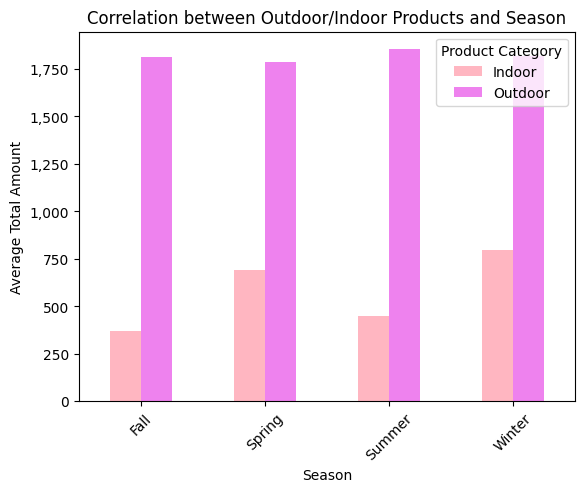

In [170]:
#indoor/outdoor variable

#define criteria to categorize product lines as "Outdoor" or "Indoor"
outdoor_product_lines = ['Bikes']
indoor_product_lines = ['Mobile', 'Cameras', 'Electronics', 'Accessories', 'Clothing', 'Projector', 'Laptop', 'OfficeProducts']

#create a new column to store the categorization
df['product_category'] = df['product_line'].apply(lambda x: 'Outdoor' if x in outdoor_product_lines else 'Indoor')

#group the data by season and product category
correlation_data = df.groupby(['season', 'product_category'])['total_amount'].mean().reset_index()

#pivot the table to prepare for plotting
pivot_table = correlation_data.pivot(index='season', columns='product_category', values='total_amount')

#plot the correlation
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['lightpink', 'violet'])
plt.title('Correlation between Outdoor/Indoor Products and Season')
plt.xlabel('Season')
plt.ylabel('Average Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()
